<a href="https://colab.research.google.com/github/TGADEstadisticaI/EstadisticaI/blob/main/8%20Regresi%C3%B3n%20Lineal/TGAD_Estad%C3%ADstica_Clase_U8_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<figure>
<center>
<img src='https://www.economicas.uba.ar/wp-content/uploads/2020/08/cropped-logo_FCE.png' />
</figure>

# **Universidad de Buenos Aires**
## **Facultad de Ciencias Económicas**

### **Estadística I**

### Cátedra: Bianco

#### **Resolución ejemplos clase U8 con Python**

***Material elaborado por la profesora Natalia Salaberry***

###**Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
from IPython.display import display, Math

###EJEMPLO

In [ ]:
data= {'X':[24,	32,	14,	23,	35,	28,	14,	19, 25, 18],
        'Y':	[5298,	8100,	4506,	4816,	8768,	6486,	3022,	5676, 5524, 4152]}

df = pd.DataFrame(data)

df

,X,Y
0,24,5298
1,32,8100
2,14,4506
3,23,4816
4,35,8768
5,28,6486
6,14,3022
7,19,5676
8,25,5524
9,18,4152


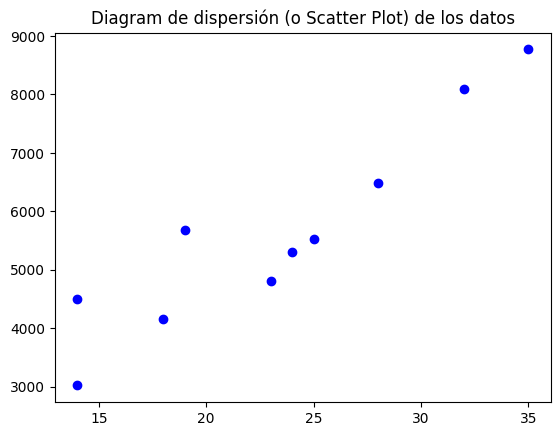

In [ ]:
plt.scatter(df['X'],df['Y'], color='blue')
plt.title('Diagram de dispersión (o Scatter Plot) de los datos')
plt.show()

Pareciera adecuado aplicar un modelo lineal.

Para estar seguros calculamos el coeficiente de correlación lineal:

In [ ]:
df.corr()

,X,Y
X,1.000000,0.927081
Y,0.927081,1.000000


Observamos que existe uan relación lineal fuertemente positiva (R > 0.8), entonces es adecuado estimar con un modelo lineal

**Estimación de coeficientes**

In [ ]:
suma_XY=sum(df['X']*df['Y'])
med_X=df['X'].mean()
med_Y=df['Y'].mean()
n=len(df)

Sxy=suma_XY-(n*med_X*med_Y)

suma_X2=sum(df['X']**2)
Sxx=suma_X2-(n*(med_X**2))

beta1=round(Sxy/Sxx,4)
beta1


np.float64(228.1608)

In [ ]:
beta0=round(med_Y-(beta1*med_X),4)
beta0

np.float64(341.4694)

**Recta de regresión**

In [ ]:
display(Math(r'\hat Y = '+str(beta0)+' +'+str(beta1)+'X'))

<IPython.core.display.Math object>

**Agregamos los $ \hat Y$ en el dataframe y calculamos los errores**

In [ ]:
df['Y_est']=beta0+(beta1*df['X'])
df

,X,Y,Y_est
0,24,5298,5817.3286
1,32,8100,7642.6150
2,14,4506,3535.7206
3,23,4816,5589.1678
4,35,8768,8327.0974
5,28,6486,6729.9718
6,14,3022,3535.7206
7,19,5676,4676.5246
8,25,5524,6045.4894
9,18,4152,4448.3638


In [ ]:
df['error']=df['Y']-df['Y_est']
df

,X,Y,Y_est,error
0,24,5298,5817.3286,-519.3286
1,32,8100,7642.6150,457.3850
2,14,4506,3535.7206,970.2794
3,23,4816,5589.1678,-773.1678
4,35,8768,8327.0974,440.9026
5,28,6486,6729.9718,-243.9718
6,14,3022,3535.7206,-513.7206
7,19,5676,4676.5246,999.4754
8,25,5524,6045.4894,-521.4894
9,18,4152,4448.3638,-296.3638


**Verificamos que la media de los errores es cero**

In [ ]:
round(df['error'].sum() /len(df),0)

np.float64(0.0)

**Graficamos**

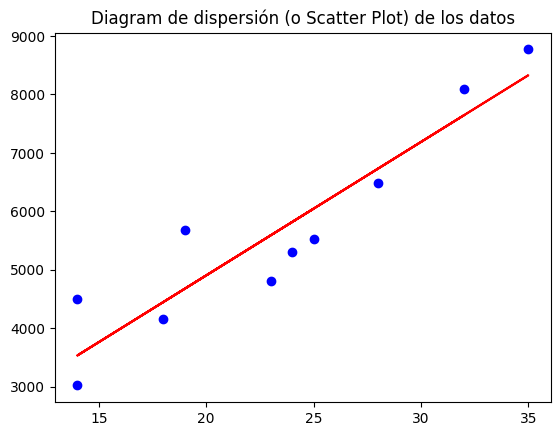

In [ ]:
plt.scatter(df['X'],df['Y'], color='blue')
plt.plot(df['X'],df['Y_est'], color='red')
plt.title('Diagram de dispersión (o Scatter Plot) de los datos')
plt.show()

**Medidas de bondad de ajuste**

In [ ]:
SCT=sum((df['Y']-df['Y'].mean())**2)
print(SCT)
SCE=sum((df['Y']-df['Y_est'])**2)
print(SCE)
SCR=sum((df['Y_est']-df['Y'].mean())**2)
print(SCR)

27716145.6
3894693.76223848
23821443.660478484


**Coeficiente de Determinanción**

In [ ]:
R2=1-(SCE/SCT)
R2

0.8594792429493342

**Coeficiente de correlación muestral**

In [ ]:
suma_Y2=sum(df['Y']**2)
Syy=suma_Y2-(len(df)*(df['Y'].mean()**2))

R= Sxy/((Sxx*Syy)**0.5)
R

np.float64(0.9270810336477384)

###**Utilizando una API**

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(df['X'].values.reshape(-1,1), prepend=True)
modelo = sm.OLS(endog=df['Y'], exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     48.93
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           0.000113
Time:                        22:03:34   Log-Likelihood:                -78.552
No. Observations:                  10   AIC:                             161.1
Df Residuals:                       8   BIC:                             161.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        341.4685    788.234      0.433      0.6